# **강의 5: 특허 데이터 분석 (I)**

일시: 2022년 10월5일\
장소: 공과대학 401동 315호

# **한글폰트 사용**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

**런타임 다시 시작 후에는 여기서부터 진행**

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
%matplotlib inline
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")
print(nanum_font)

nanum_font number: 10
['/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf']


In [2]:
plt.rc('font', family='NanumBarunGothic') # 사용하는 폰트는 "나눔바른고딕"으로 고정

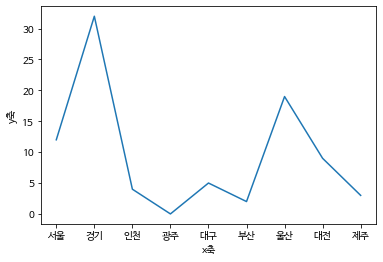

In [3]:
# 테스트 - 한글 출력이 되는지 확인
plt.plot(['서울', '경기', '인천', '광주', '대구', '부산', '울산', '대전', '제주'], [12, 32, 4, 0, 5, 2, 19, 9, 3])
plt.xlabel('x축')
plt.ylabel('y축')
plt.show()

🏃 **재시작 후 진행 필수**

# **📝특허 데이터 수집 (data collection) 및 저장**

# **KIPRIS 데이터 활용**


* 특허 데이터 검색을 위한 KIPRIS 사이트: http://kpat.kipris.or.kr/kpat/searchLogina.do?next=MainSearch \
* 참고 논문: 백현미, & 김명숙. (2013). 특허 네트워크 분석을 통한 융합 기술 트렌드 분석: 한국. 미국. 유럽. 일본의 특허데이터를 중심으로. 벤처창업연구, 8(2), 11-19.\
(논문은 학교 IP 사용시 다음 링크로 다운이 가능: https://www.dbpia.co.kr/pdf/pdfView.do?nodeId=NODE06503465&googleIPSandBox=false&mark=0&useDate=&ipRange=false&accessgl=Y&language=ko_KR&hasTopBanner=true)

* 위 논문을 구현해 볼 예정입니다. (부분적 수정 포함)

## **논문의 목적**

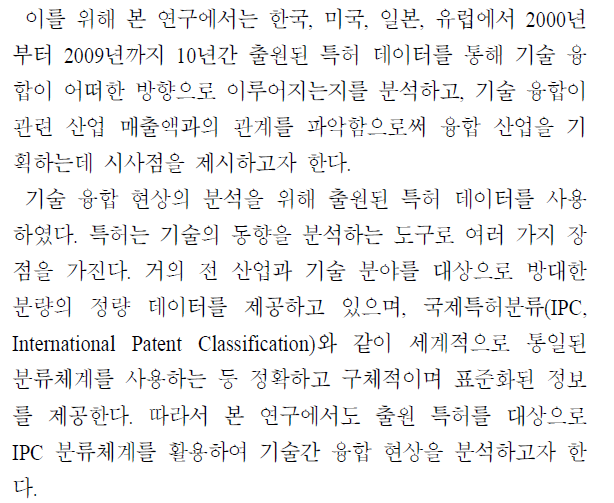

## **데이터 수집 방법**

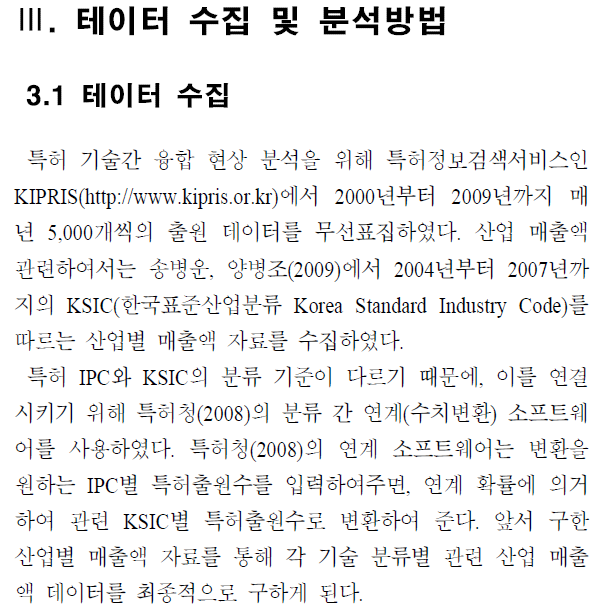

"무선표집 하였다" 라고 표현. (Random sampling: 무선표집)

- 여기서 드는 의문점 -\
❓ 왜 random sampling을 했을까?
- 추측\
❓ 아마 데이터 수집에 문제가 있어서, 그러지 않았을까?

❓ 위 논문에서는 한국 논문 및 보고서에 대한 출처(reference)가 누락되 있음

정확히 어떤 데이터를 수집했는지 의문점이 듬 --> 새로운 접근방법이 필요

## **데이터 수집 전략 - 한국에 등록된 특허만을 일단 수집**

KIPRIS에서 검색시: 2000년 1월 1일 부터 2009년 12월 31일까지 백만건이 넘는 데이터 확인

범위 및 출원인 조정을 통한 data modification이 필요

범위조정을 위해 특정 출원인을 선택\
여기서는 "**삼성전자**"를 선택\
검색기간: 2000년 ~ 2009년

## **수집은 KIPRIS를 통해서 가능**

이론과 관련해서는 PDF 파일을 참조해주세요.

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

In [4]:
!pip install --upgrade xlrd # 엑셀 파일 처리를 위한 최신 라이브러리 필요

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


🏃 **runtime 재시작 필수**

In [5]:
# 구글 드라이브 마운트 - (구글 드라이브와 연결 하는 과정)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import glob # 파일명을 리스트 형태로 반환해주는 라이브러리
filepath = '/content/drive/MyDrive/빅데이터분석_공학/samsung_pat' # 구글 드라이브에서 파일이 저장되어 있는 경로를 지정
output = glob.glob(filepath + '/*.xls') # xls로 끝이나는 모든 파일에 대해서 불러와 파일의 전체 경로를 "리스트" 형태로 저장

In [7]:
import pandas as pd
pd.set_option('display.max_columns', None)
# 하나의 파일만 불러오기
test = pd.read_excel(output[0]) # output[0]은 데이터의 경로를 의미
test.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,한국특허정보원,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,검색식 : AD=[20000101~20001231]*AP=[삼성전자],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,발행일시 : 2022/09/02 23:59:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,순서,심사진행상태,출원번호,출원일자,발명의명칭,출원인,IPC분류,CPC분류,공고번호,공고일자,공개번호,공개일자,등록번호,등록일자,원출원번호,원출원번호일자,심사청구여부/일자,심사청구항수,발명자,대리인,우선권정보,지정국,국제출원번호,국제출원일자,국제공개번호,국제공개일자,법적상태,관련 출원번호,요약,청구항,번역문제출일자
7,1,거절결정(일반),10-2000-0006554,2000.02.11,인쇄회로기판과 연성인쇄회로 케이블의 접합 구조(JUNCTION STRUCTURE O...,삼성전자주식회사(경기도 수원시 영통구...),H05K 1/18(2006.01),H05K 1/184(2013.01)|H05K 1/189(2013.01)|H05K 2...,NaN,NaN,10-2001-0083356,2001.09.01,NaN,NaN,NaN,NaN,Y(2000.09.21),5,주두식(경상북도구미시송...),이건주(서울 종로구 명륜동*가 ***-* 미화빌딩 이건주특허법률사무소),NaN,NaN,NaN,NaN,NaN,NaN,거절,NaN,"본 발명은 인쇄회로기판과 연성인쇄회로 케이블의 접합 구조에 있어서, 일단에 형성된 ...","[청구항 1]인쇄회로기판과 연성인쇄회로 케이블의 접합 구조에 있어서,일단에 형성된 ...",NaN
8,2,등록결정(일반),10-2000-0079130,2000.12.20,반도체 제조설비의 리테이너링 높이조절장치(A RETAINER RING HEIGHT ...,삼성전자주식회사(경기도 수원시 영통구...),B24B 37/32(2012.01)|B24B 37/04(2006.01),B24B 37/32(2013.01)|B24B 37/04(2013.01),NaN,2006.11.10,10-2002-0049834,2002.06.26,10-0643489-0000,2006.11.01,NaN,NaN,Y(2005.11.29),9,김춘광(경기도용인시기흥읍공세...),"김능균(서울특별시 강남구 논현로 ** *층 (개포동, 글로리빌딩)(새움국제특허법률사...",NaN,NaN,NaN,NaN,NaN,NaN,소멸 (등록료불납),NaN,본 발명은 반도체 제조설비에서 캐리어(CARRIER)와 리테이너링 사이에 일정한 높...,[청구항 1] 반도체 제조설비에서 리테이너링 높이조절장치...,NaN
9,3,등록결정(일반),10-2000-0050444,2000.08.29,냉동사이클용 3방향 냉매조절밸브(3-way type refrigerant contr...,삼성전자주식회사(경기도 수원시 영통구...),F25B 41/20(2021.01)|F25B 41/30(2021.01),F25B 41/20(2021.01)|F25B 41/30(2021.01)|F25B 2...,NaN,2003.06.25,10-2001-0107494,2001.12.07,10-0388654-0000,2003.06.10,NaN,NaN,Y(2000.08.29),14,김완용(광주광역시 광산구...)|김경돈(서울특별시 광진구...),"서상욱(서울특별시 강남구 테헤란로 ***, *층 세림특허법률사무소 (역삼동, 신중앙...",1020000029050 (2000.05.29) 대한민국KR,NaN,NaN,NaN,NaN,NaN,소멸 (등록료불납),NaN,"본 발명은 냉동사이클용 3방향 냉매조절밸브에 관한 것으로, 그 목적은 병렬로 배치된...",[청구항 1] 출구(42B)(422)와 오리피스(42A)(421)가 형성된 제1밸브...,NaN


In [ ]:
test = pd.read_excel(output[0], skiprows=7) # skiprows를 사용해서 원하는 위치의 행 파일을 불러오기
test.head()

In [9]:
## 파일의 경로를 기반으로, 하나씩 불러온뒤 자동으로 합쳐주는 과정을 진행 
df = pd.concat((pd.read_excel(f, header = 0, skiprows=7) for f in output)) # concat는 영어의 concatenate의 약자로, '이어주다','연결시키다'의 의미를 지님

In [10]:
df.shape

(103047, 31)

In [12]:
df.head()

,순서,심사진행상태,출원번호,출원일자,발명의명칭,출원인,IPC분류,CPC분류,공고번호,공고일자,공개번호,공개일자,등록번호,등록일자,원출원번호,원출원번호일자,심사청구여부/일자,심사청구항수,발명자,대리인,우선권정보,지정국,국제출원번호,국제출원일자,국제공개번호,국제공개일자,법적상태,관련 출원번호,요약,청구항,번역문제출일자
0,1,거절결정(일반),10-2000-0006554,2000.02.11,인쇄회로기판과 연성인쇄회로 케이블의 접합 구조(JUNCTION STRUCTURE O...,삼성전자주식회사(경기도 수원시 영통구...),H05K 1/18(2006.01),H05K 1/184(2013.01)|H05K 1/189(2013.01)|H05K 2...,NaN,NaN,10-2001-0083356,2001.09.01,NaN,NaN,NaN,NaN,Y(2000.09.21),5,주두식(경상북도구미시송...),이건주(서울 종로구 명륜동*가 ***-* 미화빌딩 이건주특허법률사무소),NaN,NaN,NaN,NaN,NaN,NaN,거절,NaN,"본 발명은 인쇄회로기판과 연성인쇄회로 케이블의 접합 구조에 있어서, 일단에 형성된 ...","[청구항 1]인쇄회로기판과 연성인쇄회로 케이블의 접합 구조에 있어서,일단에 형성된 ...",NaN
1,2,등록결정(일반),10-2000-0079130,2000.12.20,반도체 제조설비의 리테이너링 높이조절장치(A RETAINER RING HEIGHT ...,삼성전자주식회사(경기도 수원시 영통구...),B24B 37/32(2012.01)|B24B 37/04(2006.01),B24B 37/32(2013.01)|B24B 37/04(2013.01),NaN,2006.11.10,10-2002-0049834,2002.06.26,10-0643489-0000,2006.11.01,NaN,NaN,Y(2005.11.29),9,김춘광(경기도용인시기흥읍공세...),"김능균(서울특별시 강남구 논현로 ** *층 (개포동, 글로리빌딩)(새움국제특허법률사...",NaN,NaN,NaN,NaN,NaN,NaN,소멸 (등록료불납),NaN,본 발명은 반도체 제조설비에서 캐리어(CARRIER)와 리테이너링 사이에 일정한 높...,[청구항 1] 반도체 제조설비에서 리테이너링 높이조절장치...,NaN
2,3,등록결정(일반),10-2000-0050444,2000.08.29,냉동사이클용 3방향 냉매조절밸브(3-way type refrigerant contr...,삼성전자주식회사(경기도 수원시 영통구...),F25B 41/20(2021.01)|F25B 41/30(2021.01),F25B 41/20(2021.01)|F25B 41/30(2021.01)|F25B 2...,NaN,2003.06.25,10-2001-0107494,2001.12.07,10-0388654-0000,2003.06.10,NaN,NaN,Y(2000.08.29),14,김완용(광주광역시 광산구...)|김경돈(서울특별시 광진구...),"서상욱(서울특별시 강남구 테헤란로 ***, *층 세림특허법률사무소 (역삼동, 신중앙...",1020000029050 (2000.05.29) 대한민국KR,NaN,NaN,NaN,NaN,NaN,소멸 (등록료불납),NaN,"본 발명은 냉동사이클용 3방향 냉매조절밸브에 관한 것으로, 그 목적은 병렬로 배치된...",[청구항 1] 출구(42B)(422)와 오리피스(42A)(421)가 형성된 제1밸브...,NaN
3,4,등록결정(일반),10-2000-0086776,2000.12.30,공기조화기의 과열도 제어 시스템 및 그 제어 방법(Control system of ...,삼성전자주식회사(경기도 수원시 영통구...),F25B 49/02(2022.01)|F25B 41/34(2021.01),F25B 49/02(2022.01)|F25B 41/34(2021.01)|F25B 2...,NaN,2003.08.27,10-2001-0110627,2001.12.13,10-0395919-0000,2003.08.14,NaN,NaN,Y(2000.12.30),7,문중기(서울특별시강동구...)|김영만(서울특별시서초구...)|이정민(경기도수원시팔달...,"서상욱(서울특별시 강남구 테헤란로 ***, *층 세림특허법률사무소 (역삼동, 신중앙...",1020000031147 (2000.06.07) 대한민국KR,NaN,NaN,NaN,NaN,NaN,소멸 (등록료불납),NaN,"본 발명의 공기조화기는, 듀티제어신호에 따라 펄스폭변조방식으로 제어되는 압축기, 압...","[청구항 1] 듀티제어신호에 따라 펄스폭변조방식으로 제어되는 압축기, 상기 압축기와...",NaN
4,5,취하(심사미청구),10-2000-0020286,2000.04.18,디지탈전송시스템의 데이터 전송을 위한 어드레스발생장치(ADDRESS GENERATI...,삼성전자주식회사(경기도 수원시 영통구...),H04L 61/50(2022.01)|H04L 27/26(2006.01),H04L 61/50(2022.05)|H04L 27/2628(2021.01),NaN,NaN,10-2001-0096261,2001.11.07,NaN,NaN,NaN,NaN,N,3,이정주(서울특별시강서구...),이건주(서울 종로구 명륜동*가 ***-* 미화빌딩 이건주특허법률사무소),NaN,NaN,NaN,NaN,NaN,NaN,취하,NaN,본 발명은 디지털 전송시스템에서 ADSL서비스를 위한 DMT방식에서 데이터를 송수신...,"[청구항 1]디지탈전송시스템의 데이터 전송을 위한 어드레스 발생장치에 있어서,기준어...",NaN


In [ ]:
# 합친 데이터를 csv로 저장하는 경우, 그 크기는 대략: 660 MB 
# 데이터의 사이즈가 아주 크지는 않지만, e-mail로 주고 받거나 공유하기가 힘든 사이즈 (excel 파일로 저장하면, 파일의 크기는 더 증가)
# 보다 효율적으로 데이터를 공유할 수 있는 형태가 필요함
# df.to_csv("samsung_patent.csv")
# df.to_excel("samsung_patent.xlsx")

## **대용량의 데이터의 경우 parquet을 사용** 

parquet을 사용해 데이터 용량을 줄이는 작업\
parquet이란?
* 효율적인 데이터 저장 및 검색을 위해 설계된 오픈 소스, 열 지향 데이터 파일 형식
* 복잡한 데이터를 대량으로 처리하기 위해 향상된 성능과 함께 효율적인 데이터 압축 및 인코딩 체계를 지님
* 여러가지 언어를 지원: Java, C++, Python 등

더 자세한 내용은 다음의 링크 참조: https://wesmckinney.com/blog/python-parquet-update/

In [4]:
# parquet 사용을 위한 관련 라이브러리 설치
!pip install fastparquet
!pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**parquet 형태로 저장**

In [ ]:
# 시간이 조금 걸리는 작업 (약 50초)
# df.to_parquet("samsung.parquet.gzip", compression='gzip') # 파일의 사이즈: 약 100 MB
# 위 파일은 제가 LMS에 미리 공유를 해드렸습니다. (구글 드라이브 주소를 공지사항에 남겼습니다)
# 구글 드라이브로 업로드 하셔서, 경로를 불러오시면 됩니다. 

**parquet 형태의 파일 불러오기** (이 부분에서 데이터 불러오기)

In [12]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [6]:
# pd.read_parquet() 형태로 저장
samsung = pd.read_parquet("/content/drive/MyDrive/빅데이터분석_공학/자료/samsung.parquet.gzip").reset_index(drop=True) # 구글 드라이브의 경로 삽입
samsung.shape

(103047, 31)

In [7]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103047 entries, 0 to 103046
Data columns (total 31 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   순서         103047 non-null  int64  
 1   심사진행상태     103047 non-null  object 
 2   출원번호       103047 non-null  object 
 3   출원일자       103047 non-null  object 
 4   발명의명칭      103047 non-null  object 
 5   출원인        103047 non-null  object 
 6   IPC분류      103045 non-null  object 
 7   CPC분류      103045 non-null  object 
 8   공고번호       0 non-null       float64
 9   공고일자       56795 non-null   object 
 10  공개번호       96078 non-null   object 
 11  공개일자       96078 non-null   object 
 12  등록번호       56795 non-null   object 
 13  등록일자       56795 non-null   object 
 14  원출원번호      905 non-null     object 
 15  원출원번호일자    905 non-null     object 
 16  심사청구여부/일자  103047 non-null  object 
 17  심사청구항수     103047 non-null  int64  
 18  발명자        103047 non-null  object 
 19  대리인        103047 non-n

In [8]:
samsung.tail() # 데이터를 합친 경우, tail()을 통해 마지막 index 번호에 대한 확인이 필요

,순서,심사진행상태,출원번호,출원일자,발명의명칭,출원인,IPC분류,CPC분류,공고번호,공고일자,...,지정국,국제출원번호,국제출원일자,국제공개번호,국제공개일자,법적상태,관련 출원번호,요약,청구항,번역문제출일자
103042,977,거절결정(일반),10-2009-0001600,2009.01.08,어레이 잉크젯 헤드의 정렬오차 보정방법(Alignment error compensa...,삼성전자주식회사(경기도 수원시 영통구...),B41J 2/21(2006.01)|B41J 2/155(2006.01)|B41J 2/...,B41J 2/2135(2013.01)|B41J 2/155(2013.01)|B41J ...,NaN,None,...,None,None,None,None,None,거절,None,"개시된 정렬오차 보상방법은, 하나의 주주사 선을 인쇄하기 위한 복수의 헤드 칩을 구...",[청구항 1]하나의 주주사 선을 인쇄하기 위한 복수의 헤드 칩을 구비하는 어레이 잉...,None
103043,978,취하(심사미청구),10-2009-0001250,2009.01.07,적층된 반도체 산화물 트랜지스터를 구비한 논리소자(Logic circuit devi...,삼성전자주식회사(경기도 수원시 영통구...),H01L 27/04(2006.01)|H01L 29/786(2006.01)|H01L ...,H01L 29/7869(2013.01)|H01L 29/78642(2013.01)|H...,NaN,None,...,None,None,None,None,None,취하,None,적층된 반도체 산화물 트랜지스터를 구비한 논리소자에 관해 개시되어 있다. 개시된 논...,[청구항 1]제1반도체산화물 채널층을 구비한 제1 반도체 산화물 트랜지스터; \n제...,None
103044,979,거절결정(일반),10-2009-0000890,2009.01.06,로봇의 소리 인식 장치 및 그 제어 방법(Sound recognition appar...,삼성전자주식회사(경기도 수원시 영통구...),B25J 19/02(2006.01)|G10L 25/78(2013.01)|B25J 1...,B25J 19/026(2013.01)|G10L 25/78(2013.01)|B25J ...,NaN,None,...,None,None,None,None,None,거절,None,"본 발명은 소리를 감지하고, 감지된 소리와 미리 설정된 기준조건을 비교하여 대화 의...",[청구항 1]소리를 감지하는 소리 감지부;\n상기 감지된 소리와 미리 설정된 기준조...,None
103045,980,취하(심사미청구),10-2009-0000710,2009.01.06,냉장고(REFRIGERATOR),삼성전자주식회사(경기도 수원시 영통구...),F25D 27/00(2006.01)|F21V 7/00(2015.01)|F21V 19...,F25D 27/00(2013.01)|F21V 7/0008(2013.01)|F21V ...,NaN,None,...,None,None,None,None,None,취하,None,"본 발명은 냉장고를 제공하기 위한 것으로 저장실과, 저장실을 개폐하는 도어와, 저장...","[청구항 1]저장실과, 상기 저장실을 개폐하는 도어와, 상기 저장실을 조명하는 조명...",None
103046,981,등록결정(일반),10-2009-0000380,2009.01.05,아웃 포커싱 장치 및 방법(APPARATUS AND METHOD FOR OUT-FO...,삼성전자주식회사(경기도 수원시 영통구...),H04N 5/232(2006.01)|G03B 13/36(2021.01)|G06T 7...,H04N 5/23229(2013.01)|H04N 5/23293(2013.01)|G0...,NaN,2015.06.04,...,None,None,None,None,None,소멸 (등록료불납),None,본 발명은 아웃 포커싱 장치 및 방법에 관한 것이다. 이를 위해 본 발명은 원본 이...,[청구항 1]원본 이미지를 타겟 이미지와 아웃 포커싱 처리하고자 하는 배경 이미지로...,None


In [9]:
# 결측 데이터 확인
samsung.isnull().sum()

순서                0
심사진행상태            0
출원번호              0
출원일자              0
발명의명칭             0
출원인               0
IPC분류             2
CPC분류             2
공고번호         103047
공고일자          46252
공개번호           6969
공개일자           6969
등록번호          46252
등록일자          46252
원출원번호        102142
원출원번호일자      102142
심사청구여부/일자         0
심사청구항수            0
발명자               0
대리인               0
우선권정보         96124
지정국          103002
국제출원번호       102699
국제출원일자       102699
국제공개번호       102700
국제공개일자       102700
법적상태              0
관련 출원번호      101150
요약                0
청구항               0
번역문제출일자      102699
dtype: int64

In [10]:
features = samsung.columns.tolist()
print(features)

['순서', '심사진행상태', '출원번호', '출원일자', '발명의명칭', '출원인', 'IPC분류', 'CPC분류', '공고번호', '공고일자', '공개번호', '공개일자', '등록번호', '등록일자', '원출원번호', '원출원번호일자', '심사청구여부/일자', '심사청구항수', '발명자', '대리인', '우선권정보', '지정국', '국제출원번호', '국제출원일자', '국제공개번호', '국제공개일자', '법적상태', '관련 출원번호', '요약', '청구항', '번역문제출일자']


In [13]:
samsung[samsung['IPC분류'].isna()] # isna() 결측치가 있는 부분을 확인하는데 사용 
# IPC가 없는 특허만 따로 나타냄, KIPRIS 또는 구글 특허(google patents)에서 별도의 검색을 통해 IPC를 수동으로 입력
# 등록번호 10-0762613 --> H04N 7/00 (2006.01), H04B 1/40 (2006.01)
# 등록번호 10-0753396 --> H04N 7/00 (2006.01), H04L 12/18 (2006.01)

,순서,심사진행상태,출원번호,출원일자,발명의명칭,출원인,IPC분류,CPC분류,공고번호,공고일자,공개번호,공개일자,등록번호,등록일자,원출원번호,원출원번호일자,심사청구여부/일자,심사청구항수,발명자,대리인,우선권정보,지정국,국제출원번호,국제출원일자,국제공개번호,국제공개일자,법적상태,관련 출원번호,요약,청구항,번역문제출일자
75384,3553,등록결정(일반),10-2006-0024834,2006.03.17,디지털 방송 수신 단말기의 디지털 방송 출력 방법(METHOD FOR OUTPUTT...,삼성전자주식회사(경기도 수원시 영통구...),None,None,NaN,2007.10.01,10-2007-0094307,2007.09.20,10-0762613-0000,2007.09.20,None,None,Y(2006.03.17),12,임동수(경상북도 구미시 ...)|박영식(대구광역시 북구...),이건주(서울 종로구 명륜동*가 ***-* 미화빌딩 이건주특허법률사무소),None,None,None,None,None,None,소멸 (등록료불납),None,"본 발명은 디지털 방송 수신 단말기의 디지털 방송 출력 방법에 있어서, 상기 디지털...","[청구항 1]디지털 방송 수신 단말기의 디지털 방송 출력 방법에 있어서,상기 디지털...",None
76210,4379,등록결정(일반),10-2006-0015369,2006.02.17,복수의 정보를 포함하는 방송데이터 전송방법 및 그 장치(METHOD AND APPA...,삼성전자주식회사(경기도 수원시 영통구...),None,None,NaN,2007.08.30,10-2007-0082604,2007.08.22,10-0753396-0000,2007.08.23,None,None,Y(2006.02.17),18,양해정(부산 금정구...)|김진원(서울 서초구...)|김광수(서울 강남구...)|민...,"윤동열(서울시 금천구 가산디지털*로 *** ***호(가산동, 에이스하이엔드타워*차)...",None,None,None,None,None,None,소멸 (등록료불납),None,"본 발명은 복수의 정보를 포함하는 방송데이터 전송방법 및 그 장치에 관한 것으로서,...","[청구항 1]복수의 정보를 포함하는 방송데이터 전송 방법에 있어서, 상기 복수의 정...",None


* 수기로 누락된 부분에 대해서 입력해 데이터 보완
* 2건이기 때문에 가능하며, 당연히 데이터의 갯수가 늘어나면 많은 시간을 투자해야함으로 불가능한 작업 ("노가다")
* IPC관련 정보 확인(영문): https://www.wipo.int/classifications/ipc/en/ (개인적으로 더 선호)

* IPC관련 정보 확인(한국어): http://www.kipris.or.kr/kpat/remocon/frame.jsp?kind=2&start=IPC&IPC_CODE=undefined

In [ ]:
samsung['IPC분류'].iloc[1] # 어떤 형식으로 데이터가 저장되어 있는지 검색이 필요

In [14]:
missing_ipc = samsung[samsung['IPC분류'].isna()].index.tolist() # IPC분류 값이 없는 행의 INDEX 번호만 따로 저장 
missing_ipc

[75384, 76210]

In [15]:
# 강제로 값을 할당 - Google patents에서 검색 후 할당 (kipris에서는 검색이 직관적이지 않음)
# Dataframe.loc[row_indexer,col_indexer] = value 형식
samsung.loc[missing_ipc[0],'IPC분류'] = "H04N 7/00(2006.01)|H04B 1/40(2006.01)"
samsung.loc[missing_ipc[1],'IPC분류'] = "H04N 7/00(2006.01)|H04L 12/18(2006.01)"

In [16]:
# 확인하는 작업
samsung['IPC분류'].iloc[75384]

'H04N 7/00(2006.01)|H04B 1/40(2006.01)'

In [17]:
# 확인하는 작업
samsung['IPC분류'].iloc[76210]

'H04N 7/00(2006.01)|H04L 12/18(2006.01)'

In [18]:
samsung.iloc[75384]

순서                                                        3553
심사진행상태                                                등록결정(일반)
출원번호                                           10-2006-0024834
출원일자                                                2006.03.17
발명의명칭        디지털 방송 수신 단말기의 디지털 방송 출력 방법(METHOD FOR OUTPUTT...
출원인                                   삼성전자주식회사(경기도 수원시 영통구...)
IPC분류                    H04N 7/00(2006.01)|H04B 1/40(2006.01)
CPC분류                                                     None
공고번호                                                       NaN
공고일자                                                2007.10.01
공개번호                                           10-2007-0094307
공개일자                                                2007.09.20
등록번호                                           10-0762613-0000
등록일자                                                2007.09.20
원출원번호                                                     None
원출원번호일자                                                

**CPC의 경우 나중에 나온 분류체계로서, IPC를 특정 CPC에 매칭을 시킴**

매칭시키는 방법에 관한 설명:
https://www.epo.org/searching-for-patents/helpful-resources/first-time-here/classification/cpc/ipccpc.html

1) H04N 7/00(2006.01)|H04B 1/40(2006.01) --> 매칭을 개별적으로 시켜주는 작업 진행. (* 기술동향 분석시에는 가능하나, "특허침해분석" 등 법률적 해석이 들어가야 하는 부분에서는 추천하지 않는 방법)

2) H04N 7/00(2006.01)|H04L 12/18(2006.01) --> 매칭 개별적으로 진행 


In [20]:
samsung.loc[missing_ipc[0],'CPC분류'] = "H04N 7/007(2013.01)|H04B 1/406(2013.01)"
samsung.loc[missing_ipc[1],'CPC분류'] = "H04N 7/007(2013.01)|H04L 12/189(2013.01)"

In [21]:
samsung.isnull().sum() # IPC와 CPC 부분에 대한 결측치를 해결 

순서                0
심사진행상태            0
출원번호              0
출원일자              0
발명의명칭             0
출원인               0
IPC분류             0
CPC분류             0
공고번호         103047
공고일자          46252
공개번호           6969
공개일자           6969
등록번호          46252
등록일자          46252
원출원번호        102142
원출원번호일자      102142
심사청구여부/일자         0
심사청구항수            0
발명자               0
대리인               0
우선권정보         96124
지정국          103002
국제출원번호       102699
국제출원일자       102699
국제공개번호       102700
국제공개일자       102700
법적상태              0
관련 출원번호      101150
요약                0
청구항               0
번역문제출일자      102699
dtype: int64

## **등록번호가 없는 특허들에 대한 탐색**

In [22]:
# 등록번호가 없는 특허들만 따로 저장
not_granted = samsung[samsung['등록번호'].isna()].reset_index(drop=True)
not_granted['심사진행상태'].unique()

array(['거절결정(일반)', '취하(심사미청구)', '원결정유지(심사전치)', '포기(등록결정전 포기서제출)',
       '취하(국내우선권주장)', '취하(등록결정전 취하서제출)', '포기(등록료 미납)', '취소환송후 재거절결정',
       '취하(변경 원출원)', '취하(PCT우선권주장 자기지정에 의한 취하간주)', '거절결정(재심사)',
       '취하(등록결정후 취하서제출)'], dtype=object)

In [23]:
# rename_axis 부분이 첫 번째 열 name을 조정
# reset_index(name='') 부분이 두 번째 열 name을 조정
not_granted['심사진행상태'].value_counts().rename_axis('심사진행상태').reset_index(name='counts')

,심사진행상태,counts
0,취하(심사미청구),33252
1,거절결정(일반),10962
2,원결정유지(심사전치),832
3,포기(등록료 미납),729
4,취하(국내우선권주장),156
5,거절결정(재심사),118
6,포기(등록결정전 포기서제출),110
7,취하(등록결정전 취하서제출),46
8,취소환송후 재거절결정,41
9,취하(변경 원출원),3


**여기서 얻을 수 있는 시사점**: 등록되지 못한 특허들은 거절되거나 취하된 경우 (전략적으로 거절된 사유 --> 심사미청구)

**분석을 위한 전략적 Tip**

"등록된 특허와 등록되지 않은 특허로 구분을 해서, 각 데이터셋 별 트렌드에 대한 분석도 가능"

예를 들면, 등록되지 않은 특허 중, 심사미청구로 인해 등록되지 않은 경우, 어떤 전략적 의도가 있었을지 유추해보는 것 --> 특허의 질 (?), 아니면 핵심 역량 (core competency) 분야 였는지에 대한 고민.

* 본 실습에서는 모든 데이터를 포함해서 분석할 예정

## **기본적인 분석 진행 (descriptive statistics, 기술통계)**

In [24]:
samsung['심사진행상태'].unique()
# 등록결정 (심사전치후) --> 심사후 거절결정된 경우 거절결정불복심판을 청구한 후 명세서를 보정한 건에 대해 다시 심사 후 등록

array(['거절결정(일반)', '등록결정(일반)', '취하(심사미청구)', '등록결정(심사전치후)', '원결정유지(심사전치)',
       '포기(등록결정전 포기서제출)', '취하(국내우선권주장)', '등록결정(취소환송후)', '등록취소(이의신청에의한)',
       '취하(등록결정전 취하서제출)', '포기(등록료 미납)', '이의신청후 등록유지', '취소환송후 재거절결정',
       '취하(변경 원출원)', '심판원에 의한 등록결정', '등록결정(재심사후)',
       '취하(PCT우선권주장 자기지정에 의한 취하간주)', '거절결정(재심사)', '취하(등록결정후 취하서제출)'],
      dtype=object)

In [25]:
samsung['심사진행상태'].value_counts().rename_axis('심사진행상태').reset_index(name='counts') # 특정 상태의 특허문서만 분석을 위해 고려할 것인지 고민을 해야 함

,심사진행상태,counts
0,등록결정(일반),52864
1,취하(심사미청구),33252
2,거절결정(일반),10962
3,등록결정(심사전치후),3111
4,원결정유지(심사전치),832
5,포기(등록료 미납),729
6,등록결정(취소환송후),601
7,등록결정(재심사후),203
8,취하(국내우선권주장),156
9,거절결정(재심사),118


In [26]:
samsung['법적상태'].value_counts().rename_axis('법적상태').reset_index(name='counts') # 특정 상태의 특허문서만 분석을 위해 고려할 것인지 고민을 해야 함

,법적상태,counts
0,소멸 (등록료불납),44322
1,취하,33460
2,등록,12122
3,거절,11953
4,포기,839
5,소멸 (존속기간만료),339
6,소멸 (포기),6
7,소멸 (취소결정),4
8,소멸 (무효),1
9,소멸 (기각),1


In [27]:
# 반복문을 통해서 
for i in range(10):
  print(samsung['심사청구여부/일자'].iloc[i])

Y(2000.09.21)
Y(2005.11.29)
Y(2000.08.29)
Y(2000.12.30)
N
Y(2000.12.05)
Y(2000.11.30)
Y(2003.01.13)
Y(2000.12.18)
Y(2000.02.18)


In [28]:
for i in range(5):
  print(samsung['심사청구항수'].iloc[i])

5
9
14
7
3


In [29]:
# 평균 청구항 수
print(samsung['심사청구항수'].mean())
print(samsung['심사청구항수'].max())
print(samsung['심사청구항수'].min())

11.759585431890303
201
1


In [31]:
samsung['출원일자'].iloc[0]

'2000.02.11'

In [32]:
samsung['year'] = samsung['출원일자'].str[0:4] # 출원일자에서 앞자리 4개의 연도 부분만 추출
samsung['year'] = samsung['year'].astype(int) # 숫자형으로 데이터 타입을 바꾸어 주는 작업
samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103047 entries, 0 to 103046
Data columns (total 32 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   순서         103047 non-null  int64  
 1   심사진행상태     103047 non-null  object 
 2   출원번호       103047 non-null  object 
 3   출원일자       103047 non-null  object 
 4   발명의명칭      103047 non-null  object 
 5   출원인        103047 non-null  object 
 6   IPC분류      103047 non-null  object 
 7   CPC분류      103047 non-null  object 
 8   공고번호       0 non-null       float64
 9   공고일자       56795 non-null   object 
 10  공개번호       96078 non-null   object 
 11  공개일자       96078 non-null   object 
 12  등록번호       56795 non-null   object 
 13  등록일자       56795 non-null   object 
 14  원출원번호      905 non-null     object 
 15  원출원번호일자    905 non-null     object 
 16  심사청구여부/일자  103047 non-null  object 
 17  심사청구항수     103047 non-null  int64  
 18  발명자        103047 non-null  object 
 19  대리인        103047 non-n

In [33]:
samsung.head(3)

,순서,심사진행상태,출원번호,출원일자,발명의명칭,출원인,IPC분류,CPC분류,공고번호,공고일자,공개번호,공개일자,등록번호,등록일자,원출원번호,원출원번호일자,심사청구여부/일자,심사청구항수,발명자,대리인,우선권정보,지정국,국제출원번호,국제출원일자,국제공개번호,국제공개일자,법적상태,관련 출원번호,요약,청구항,번역문제출일자,year
0,1,거절결정(일반),10-2000-0006554,2000.02.11,인쇄회로기판과 연성인쇄회로 케이블의 접합 구조(JUNCTION STRUCTURE O...,삼성전자주식회사(경기도 수원시 영통구...),H05K 1/18(2006.01),H05K 1/184(2013.01)|H05K 1/189(2013.01)|H05K 2...,NaN,None,10-2001-0083356,2001.09.01,None,None,None,None,Y(2000.09.21),5,주두식(경상북도구미시송...),이건주(서울 종로구 명륜동*가 ***-* 미화빌딩 이건주특허법률사무소),None,None,None,None,None,None,거절,None,"본 발명은 인쇄회로기판과 연성인쇄회로 케이블의 접합 구조에 있어서, 일단에 형성된 ...","[청구항 1]인쇄회로기판과 연성인쇄회로 케이블의 접합 구조에 있어서,일단에 형성된 ...",None,2000
1,2,등록결정(일반),10-2000-0079130,2000.12.20,반도체 제조설비의 리테이너링 높이조절장치(A RETAINER RING HEIGHT ...,삼성전자주식회사(경기도 수원시 영통구...),B24B 37/32(2012.01)|B24B 37/04(2006.01),B24B 37/32(2013.01)|B24B 37/04(2013.01),NaN,2006.11.10,10-2002-0049834,2002.06.26,10-0643489-0000,2006.11.01,None,None,Y(2005.11.29),9,김춘광(경기도용인시기흥읍공세...),"김능균(서울특별시 강남구 논현로 ** *층 (개포동, 글로리빌딩)(새움국제특허법률사...",None,None,None,None,None,None,소멸 (등록료불납),None,본 발명은 반도체 제조설비에서 캐리어(CARRIER)와 리테이너링 사이에 일정한 높...,[청구항 1] 반도체 제조설비에서 리테이너링 높이조절장치...,None,2000
2,3,등록결정(일반),10-2000-0050444,2000.08.29,냉동사이클용 3방향 냉매조절밸브(3-way type refrigerant contr...,삼성전자주식회사(경기도 수원시 영통구...),F25B 41/20(2021.01)|F25B 41/30(2021.01),F25B 41/20(2021.01)|F25B 41/30(2021.01)|F25B 2...,NaN,2003.06.25,10-2001-0107494,2001.12.07,10-0388654-0000,2003.06.10,None,None,Y(2000.08.29),14,김완용(광주광역시 광산구...)|김경돈(서울특별시 광진구...),"서상욱(서울특별시 강남구 테헤란로 ***, *층 세림특허법률사무소 (역삼동, 신중앙...",1020000029050 (2000.05.29) 대한민국KR,None,None,None,None,None,소멸 (등록료불납),None,"본 발명은 냉동사이클용 3방향 냉매조절밸브에 관한 것으로, 그 목적은 병렬로 배치된...",[청구항 1] 출구(42B)(422)와 오리피스(42A)(421)가 형성된 제1밸브...,None,2000


In [34]:
years = samsung['year'].value_counts().rename_axis('year').reset_index(name='counts')
years = years.sort_values(by=['year']).reset_index(drop=True) # sort_values() 정렬을 해주는 의미, "year"를 기준으로 정렬
years

,year,counts
0,2000,4907
1,2001,6399
2,2002,8052
3,2003,10628
4,2004,14516
5,2005,17330
6,2006,16082
7,2007,11498
8,2008,7654
9,2009,5981


In [35]:
# 등록일이 있는 특허만 포함
granted = samsung[samsung['등록일자'].notnull()].reset_index(drop=True) 
granted['year'] = granted['등록일자'].str[0:4]
granted['year'] = granted['year'].astype(int)
granted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56795 entries, 0 to 56794
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   순서         56795 non-null  int64  
 1   심사진행상태     56795 non-null  object 
 2   출원번호       56795 non-null  object 
 3   출원일자       56795 non-null  object 
 4   발명의명칭      56795 non-null  object 
 5   출원인        56795 non-null  object 
 6   IPC분류      56795 non-null  object 
 7   CPC분류      56795 non-null  object 
 8   공고번호       0 non-null      float64
 9   공고일자       56795 non-null  object 
 10  공개번호       49826 non-null  object 
 11  공개일자       49826 non-null  object 
 12  등록번호       56795 non-null  object 
 13  등록일자       56795 non-null  object 
 14  원출원번호      699 non-null    object 
 15  원출원번호일자    699 non-null    object 
 16  심사청구여부/일자  56795 non-null  object 
 17  심사청구항수     56795 non-null  int64  
 18  발명자        56795 non-null  object 
 19  대리인        56795 non-null  object 
 20  우선권정보 

In [36]:
years_granted = granted['year'].value_counts().rename_axis('year').reset_index(name='counts')
years_granted = years_granted.sort_values(by=['year']).reset_index(drop=True)
years_granted

,year,counts
0,2000,3
1,2001,45
2,2002,997
3,2003,1919
4,2004,2972
5,2005,4828
6,2006,10299
7,2007,10824
8,2008,4775
9,2009,1694


In [ ]:
granted[granted['year'] == 2019] # 10년 전에 출원이 되었지만 2019년에 등록 결정이 된 특허들

## **출원인, 발명자, 대리인 분석**

In [ ]:
samsung['출원인'].unique() # 동시 출원한 사람들이 존재 --> 동시 출원 분석

같은 방식으로 발명자, 대리인 등의 분석이 가능.

In [ ]:
applicant = samsung['출원인'].values.tolist() # 리스트 형태로 저장
applicant[:5]

In [ ]:
applicant_list = [name.split('|') for name in applicant]
applicant_list[:15]

In [ ]:
counting_applicant = [] # 빈 리스트 생성
for line in applicant_list: # 반복문
  for name in line:
    counting_applicant.append(name) # append는 리스트 형태에 데이터를 하나씩 더하는 기능

In [ ]:
len(counting_applicant)

In [ ]:
from collections import Counter
x1 = Counter(counting_applicant) # 현재 딕셔너리 형태로 저장
df_applicant = pd.DataFrame.from_records(list(dict(x1).items()), columns=['applicant','count'])# 딕셔너리를 dataframe으로 전환
df_applicant = df_applicant.sort_values(['count'],ascending=False) # count열을 기준을 재정렬
df_applicant.head(10)

In [ ]:
# 한국어로도 function은 작성이 가능합니다
def 괄호없애기(x):
  return x.split("(")[0]

In [ ]:
df_applicant['applicant2'] = df_applicant['applicant'].apply(괄호없애기)

In [ ]:
df_applicant.head(20)

In [ ]:
# 발명자 정보에 대한 처리
samsung['발명자'].iloc[2]

In [ ]:
inventor = samsung['발명자'].values.tolist() # 리스트 형태로 저장
inventor_list = [name.split('|') for name in inventor]
inventor_list[:10]

In [ ]:
counting_inventor = [] # 빈 리스트 생성
for line in inventor_list: # 반복문
  for name in line:
    counting_inventor.append(name) # append는 리스트 형태에 데이터를 하나씩 더하는 기능

In [ ]:
x2 = Counter(counting_inventor) # 현재 딕셔너리 형태로 저장
df_inventor = pd.DataFrame.from_records(list(dict(x2).items()), columns=['inventor','count'])# 딕셔너리를 dataframe으로 전환
df_inventor = df_inventor.sort_values(['count'],ascending=False) # count열을 기준을 재정렬
df_inventor.head(10)

In [ ]:
df_inventor['iventor2'] =df_inventor['inventor'].apply(괄호없애기)
df_inventor.head()

**대리인의 정보를 가지고 위의 코드를 직접 작성해 보세요**

In [ ]:
# 이곳에 작성



## **기초적 시각화**

In [ ]:
# 필요한 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

### **연도별 특허 출원 및 등록 트렌드**

In [ ]:
years # 출원일 기준

In [ ]:
years_granted # 등록일 기준

In [ ]:
df_concat = pd.concat([years, years_granted], axis=1)
df_concat = df_concat.iloc[:,1:4]
df_concat

In [ ]:
df_concat = df_concat.fillna(0)
df_concat.iloc[:,0] = df_concat.iloc[:,0].astype(int)
df_concat.columns = ['count_all','year','granted']
df_concat

In [ ]:
f, ax = plt.subplots(figsize = (10,6)) # x와 y의 사이즈 조정
ax = sns.barplot(data = years, x='year', y='counts', # years 데이터프레임 사용
                 palette='Blues') # 데이터 프레임, x 축 값, y 축 값, 색 조정
plt.xlabel("출원연도", fontweight='bold', fontsize = 20, labelpad = 20)
plt.ylabel("특허 출원 수", fontweight='bold', fontsize = 20, labelpad = 25)
plt.xticks(rotation=90, fontsize=15) # rotation은 x축 눈금 문자의 각도를 조정하는 기능
plt.yticks(rotation=0, fontsize=15)
plt.tight_layout() # 그래픽을 더 compact하게 만들어주는 역할
plt.show()

In [ ]:
fig,ax1 = plt.subplots(figsize = (10,6))
c1 = sns.barplot(ax = ax1, data = df_concat, x = 'year', y = 'count_all', palette = 'Blues_r')
ax2 = ax1.twinx() # 오른쪽 y 축의 조정을 위해 사용
c2 = sns.lineplot(ax = ax2, data = df_concat['granted'], color = 'red', marker='o', linewidth=3)
ax1.set_xlabel('연도', fontsize=20, labelpad=20)
ax1.set_xticklabels(df_concat['year'].values.tolist(), fontsize=15, rotation=90)
ax1.set_ylabel('특허 출원 수',fontsize=20, labelpad=20)
ax2.set_ylabel('특허 등록 수',fontsize=20, labelpad=20)

In [ ]:
grant_num = list(range(0, 12000,2000))
grant_num

In [ ]:
appli_num = list(range(2500, 20000,2500))
appli_num

In [ ]:
fig,ax1 = plt.subplots(figsize = (10,6))
c1 = sns.barplot(ax = ax1, data = df_concat, x = 'year', y = 'count_all', palette = 'Blues_r')
ax2 = ax1.twinx()
c2 = sns.lineplot(ax = ax2, data = df_concat['granted'], color = 'red', marker='o', linewidth=3)
ax1.set_xlabel('연도', fontsize=20, labelpad=20)
ax1.set_xticklabels(df_concat['year'].values.tolist(), fontsize=15, rotation=90)
ax1.set_ylabel('특허 출원 수',fontsize=20, labelpad=20)
ax2.set_ylabel('특허 등록 수',fontsize=20, labelpad=20)
ax1.set_yticks(appli_num)
ax1.set_yticklabels(appli_num, fontsize=15)
ax2.set_yticks(grant_num)
ax2.set_yticklabels(grant_num, fontsize=15)
plt.legend(['특허등록'],loc='upper right',fontsize=13)

In [ ]:
year_list = list(range(2000,2020))
year_list

In [ ]:
fig, ax1 = plt.subplots(figsize = (10,6))
sns.lineplot(ax = ax1, data = df_concat, x='year' ,y ='count_all', color = 'blue', marker='o', linewidth=3)
sns.lineplot(ax = ax1, data = df_concat, x='year' ,y ='granted', color ='red', marker='o', linewidth=3)
ax1.set_xlabel('연도', fontsize=20, labelpad=20)
ax1.set_xticks(year_list)
ax1.set_xticklabels(year_list, fontsize=15, rotation=90)
ax1.set_ylabel('특허 수',fontsize=20, labelpad=20)
ax1.set_yticklabels(list(range(0,22500,2500)), fontsize=15)
plt.legend(['출원','등록'],loc='upper right',fontsize=12)
plt.tight_layout()
plt.savefig("그림1.png",dpi=200)

### **가장 많이 출현하는 IPC 및 CPC 시각화**

In [ ]:
samsung['IPC분류'].iloc[1]

In [ ]:
ipc = samsung['IPC분류'].values.tolist() # 리스트 형태로 저장
ipc_list = [name.split('|') for name in ipc]
ipc_list[:10]

정규표현식 관련 자료: https://docs.python.org/ko/3/howto/regex.html

In [ ]:
import re # 정규표현식 (regular expression)을 다루기 위한 라이브러리
counting_ipc = [] # 빈 리스트 생성
for line in ipc_list: # 반복문
  for code in line:
    res = re.sub(r'\([^()]*\)', '', code) # 괄호를 포함 안에 있는 문자를 지워주는 기능
    # \( - 괄호를 의미
    # [^()]* - 괄호문자를 제외한 문자를 여러번
    # \) - 괄호를 의미
    counting_ipc.append(res) # append는 리스트 형태에 데이터를 하나씩 더하는 기능

In [ ]:
counting_ipc[:5]

In [ ]:
from collections import Counter
x3 = Counter(counting_ipc) # 현재 딕셔너리 형태로 저장
df_ipc = pd.DataFrame.from_records(list(dict(x3).items()), columns=['IPC code','count'])# 딕셔너리를 dataframe으로 전환
df_ipc = df_ipc.sort_values(['count'],ascending=False).reset_index(drop=True) # count열을 기준을 재정렬
df_ipc.head(10)

In [ ]:
# 연구에서는 4-digit IPC라고 해서 네자리의 IPC코드만을 이용하는 경우가 더 많음
digit4 = [code[:4] for code in counting_ipc]
digit4[:5]

In [ ]:
from collections import Counter
x4 = Counter(digit4) # 현재 딕셔너리 형태로 저장
df_ipc4 = pd.DataFrame.from_records(list(dict(x4).items()), columns=['IPC code4','count'])# 딕셔너리를 dataframe으로 전환
df_ipc4 = df_ipc4.sort_values(['count'],ascending=False).reset_index(drop=True) # count열을 기준을 재정렬
df_ipc4.head(10)

In [ ]:
# CPC를 활용
samsung['CPC분류'].iloc[1]

In [ ]:
cpc = samsung['CPC분류'].values.tolist() # 리스트 형태로 저장
cpc_list = [name.split('|') for name in cpc]
counting_cpc = [] # 빈 리스트 생성
for line in cpc_list: # 반복문
  for code in line:
    res = re.sub(r'\([^()]*\)', '', code) # 괄호를 포함 안에 있는 문자를 지워주는 기능
    counting_cpc.append(res) # append는 리스트 형태에 데이터를 하나씩 더하는 기능

In [ ]:
counting_cpc[:5]

In [ ]:
cpc_4digit = [code[:4] for code in counting_cpc]
cpc_4digit[:5]

In [ ]:
from collections import Counter
x5 = Counter(counting_cpc) # 현재 딕셔너리 형태로 저장
df_cpc = pd.DataFrame.from_records(list(dict(x5).items()), columns=['CPC code','count'])# 딕셔너리를 dataframe으로 전환
df_cpc = df_cpc.sort_values(['count'],ascending=False).reset_index(drop=True) # count열을 기준을 재정렬
df_cpc.head(10)

In [ ]:
from collections import Counter
x6 = Counter(cpc_4digit) # 현재 딕셔너리 형태로 저장
df_cpc4 = pd.DataFrame.from_records(list(dict(x6).items()), columns=['CPC code4','count'])# 딕셔너리를 dataframe으로 전환
df_cpc4 = df_cpc4.sort_values(['count'],ascending=False).reset_index(drop=True) # count열을 기준을 재정렬
df_cpc4.head(10)

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize = (16,6), constrained_layout=True) # constrained_layout=True 통해서 전체적인 그래픽을 더 compact하게 만들어줌
sns.barplot(data= df_ipc4.head(10), x='IPC code4', y='count', ax=ax[0], palette='Blues_r')
ax[0].set_xlabel('IPC code', fontsize=20, labelpad=20)
ax[0].set_xticklabels(df_ipc4.head(10)['IPC code4'].values.tolist(),fontsize=13, rotation=90)
ax[0].set_ylabel('Count',fontsize=20, labelpad=20)
ax[0].set_yticklabels(list(range(0,40000,5000)),fontsize=13, rotation=0)
sns.barplot(data= df_cpc4.head(10), x='CPC code4', y='count', ax=ax[1], palette='Reds_r')
ax[1].set_xlabel('CPC code', fontsize=20, labelpad=20)
ax[1].set_xticklabels(df_cpc4.head(10)['CPC code4'].values.tolist(),fontsize=13, rotation=90)
ax[1].set_ylabel('   ',fontsize=20, labelpad=20)
ax[1].set_yticklabels(list(range(0,60000,10000)),fontsize=13, rotation=0)
plt.savefig("그림2.png",dpi=200)
#plt.tight_layout()

### **출원인 시각화**

In [ ]:
df_applicant.head()

In [ ]:
df_applicant = df_applicant.reset_index(drop=True) # 재정렬
df_applicant.head(15)

In [ ]:
#sns.reset_defaults() # seaborn의 세팅을 초기화 시켜줄 때 사용

In [ ]:
# sns.set 사용시 오류
#sns.set(style="ticks", context="talk") # context는 일종의 스케일을 나타냄. (paper, notebook, talk, poster)
f, ax = plt.subplots(figsize = (15,6.5)) # x와 y의 사이즈 조정
ax = sns.barplot(data= df_applicant.head(15), x='applicant2', y='count',
                 palette='viridis_r') # 데이터 프레임, x 축 값, y 축 값, 색 조정
plt.xlabel("출원인명", fontweight='bold', fontsize = 20, labelpad = 20)
plt.ylabel("Count", fontweight='bold', fontsize = 20, labelpad = 25)
plt.xticks(rotation=60, fontsize=14.5) # 이 부분에서 x축의 레이블을 조정 (rotation)
plt.yticks(rotation=0, fontsize=14.5)
plt.tight_layout() # 그래픽을 더 컴팩트하게 만들어주는 역할
#plt.show()
plt.savefig('barplot_samsung.png', dpi=300) # 손쉽게 저장이 가능, 여러 다양한 파일 format으로 저장이 가능, dpi 는 300 또는 400으로 조정 (논문용)

In [ ]:
# 색상 세팅
# palette가 아닌 (단일) color를 지정해서 사용해야 하기 때문
# 색상을 hexacode 형태로 리스트에 저장
def get_color(name, number):
    pal = list(sns.color_palette(palette=name, n_colors=number).as_hex())
    return pal

In [ ]:
pal_plas = get_color('plasma_r', len(df_applicant.head(15)))
pal_spec = get_color('Spectral', len(df_applicant.head(15)))
pal_hsv = get_color('hsv', len(df_applicant.head(15)))
pal_set3 = get_color('Set3', len(df_applicant.head(15)))
pal_vi = get_color('viridis', len(df_applicant.head(15)))

In [ ]:
import plotly.express as px
fig = px.pie(df_applicant.head(15), values='count', names='applicant2',
             color ='applicant2', color_discrete_sequence=pal_vi)
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  sort=False, textfont_size=16)
fig.update_layout(width=1000, height=550)
# fig.update_layout(legend=dict(    
#     y=0.99,
#     xanchor="right",
#     x=1.0
# )) # legend 간격 조정
fig.show()

### IPC와 산업구조의 연계성

특허청에서 제공하는 산업(KSIC)-특허(IPC) 연계표\
(https://www.kipo.go.kr/ko/kpoContentView.do?menuCd=SCD0200272)

* 해당 연계표 말고, 더 다양하게 적용 가능한 연계표(concordance table)이 존재
* 이러한 정보 활용시, 기술수준 --> 더 상위 기술 그룹핑을 기반으로 묶어서 표현이 가능

In [ ]:
# 극 일부분만 적용시킨 사례
industry_ipc_concordance = {"H01L": "반도체 제조업", "G11C": "반도체 제조업",
                            "H04N":"영상 및 음향기기 제조업", "G02F":"전자부품 제조업","H04L":"통신 및 방송 장비 제조업",
                            "H04B":"통신 및 방송 장비 제조업", "H04W":"통신 및 방송 장비 제조업", "G11B":"마그네틱 및 광학매체 제조업",
                            "G03G":"사무용 기계 및 장비 제조업"}

In [ ]:
df_ipc4.head(10)

In [ ]:
df_ipc4['산업명'] = df_ipc4['IPC code4'].replace(industry_ipc_concordance)

In [ ]:
df_ipc4.head(11) # 관련 산업끼리 그루핑해서 다시 count 값에 대한 합산을 구할 수도 있습니다 

## 🔥 **기술융합 분석**

In [ ]:
samsung['IPC분류'].iloc[1]

In [ ]:
samsung['ipc_list'] = samsung['IPC분류'].apply(lambda x: x.split("|")) # 문자형 데이터를 리스트 형태로 변환
clean = [] # 빈 리스트 생성
clean2 = []
for line in samsung['ipc_list']:
  temp = []
  temp2 = []
  for code in line:
    res = re.sub(r'\([^()]*\)', '', code) # 괄호를 포함 안에 있는 문자를 지워주는 기능
    temp.append(res)
    res2 = res.split("/")[0]
    temp2.append(res2)
  clean.append(temp) # append는 리스트 형태에 데이터를 하나씩 더하는 기능
  clean2.append(temp2)

samsung['ipc_clean'] = clean
samsung['ipc_short'] = clean2
samsung['ipc_length'] = samsung['ipc_clean'].apply(len)

In [ ]:
print(samsung['ipc_length'].mean())
print(samsung['ipc_length'].max())
print(samsung['ipc_length'].min())

In [ ]:
samsung.head(3)

In [ ]:
# IPC 코드를 카운팅하는데 있어서 더 나은 방식
# 개별 IPC 코드가 몇 번이나 나오는지를 구하는 방법
ipc_occurrence = {} # 빈 딕셔너리 생성
for row in samsung['ipc_clean']:
    for element in row:
        if element not in ipc_occurrence:
            ipc_occurrence[element] = 1
        else:
            ipc_occurrence[element] += 1

In [ ]:
ipc_occurrence 

In [ ]:
from collections import Counter, OrderedDict
top20_codes = Counter(ipc_occurrence).most_common(20)
top20_codes = OrderedDict(top20_codes)

In [ ]:
top20_codes

In [ ]:
from itertools import combinations # 조합 사용
interaction_dict = {} # 빈 딕셔너리 생성
for row in samsung['ipc_clean']:
    for combination in combinations(row,2):
        combination = tuple(sorted(combination)) # 튜플 방식으로 저장, 튜플은 리스트와 같은 형태로 저장을 하지만, 튜플은 값의 변경이 불가능 (append나 인덱스를 통한 값 조정이 불가능)
        
        if not combination in interaction_dict:
            interaction_dict[combination] = 1
        else:
            interaction_dict[combination] += 1

In [ ]:
interaction_dict # 서로 동시에 출현하는 코드들의 조합 및 갯수를 구하는 방법

In [ ]:
# 딕셔너리를 데이터프레임으로 전환
ipc_convergence = pd.DataFrame(data=interaction_dict, index=[0]).T
ipc_convergence

In [ ]:
ipc_convergence.columns = ['Count']
ipc_convergence.reset_index(inplace=True)
ipc_convergence.columns = ['IPC code1', 'IPC code2', 'Count'] 
ipc_convergence = ipc_convergence.sort_values(by=['Count'], ascending=False)
ipc_convergence['relative_frequency'] = ipc_convergence['Count'] / ipc_convergence['Count'].sum()
ipc_convergence = ipc_convergence.reset_index(drop=True)
ipc_convergence

## **🕸네트워크 분석**

**네트워크 분석에 대한 기초는 다음시간에 진행하도록 하겠습니다.**

In [ ]:
import networkx as nx # 네트워크를 생성하는데 필요한 라이브러리
G = nx.Graph() # 빈 네트워크를 새성
for key in interaction_dict:
    G.add_edge(key[0],key[1], weight = interaction_dict[key])

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
print(len(Gcc))
print(len(G.nodes()))
nodes_all = list(G.nodes())

In [ ]:
G0 = G.subgraph(Gcc[0])
print(len(G0.nodes))

In [ ]:
nodelist = G0.nodes()
print(len(nodelist))

In [ ]:
nodelist = list(nodelist)
nodelist.sort()
adjmatrix = pd.DataFrame(nx.to_numpy_matrix(G0, nodelist = nodelist), columns = nodelist)
adjmatrix.index = nodelist

In [ ]:
edge_list = nx.to_pandas_edgelist(G0, nodelist=nodelist)
edge_list

In [ ]:
edge_list = edge_list.sort_values(by=['weight'], ascending=False)
edge_list.to_excel("all_edge_list.xlsx",index=False) # 위의 ipc_convergence와 같은 내용

In [ ]:
print(nx.density(G0)) # https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html
print(nx.info(G0))

In [ ]:
(2 * 76967) / (10181*10180) # 공식에 의해 산출

**네트워크의 시각화는 다음 번에 진행**

In [ ]:
nx.write_gexf(G0, 'one_cluster_samsung.gexf') # 네트워크 시각화를 위한 파일 생성

In [ ]:
nx.write_gexf(G, 'complete_samsung.gexf') # 네트워크 시각화를 위한 파일 생성, 전체 네트워크를 대상으롷

In [ ]:
G0_distance_dict = {(e1, e2): 1 / weight for e1, e2, weight in G0.edges(data='weight')}
nx.set_edge_attributes(G0, G0_distance_dict, 'distance')

**많은 시간이 소요되는 작업 (네트워크의 중심성 값 산출 - 3시간 30분 이상 소요)**


In [ ]:
# degree_centrality = dict(G0.degree(weight='weight'))
# df_degree = pd.DataFrame(list(degree_centrality.items()), columns=['Category','Weighted_Degree centrality'])

# degree_centrality2 = nx.degree_centrality(G0)
# df_degree2 = pd.DataFrame(list(degree_centrality2.items()), columns=['Category','Degree centrality'])

# closeness_centrality = nx.closeness_centrality(G0, distance = 'distance') # 굉장히 오래 걸릴 수 있는 부분
# df_closeness = pd.DataFrame(list(closeness_centrality.items()), columns=['Category','Distance_Closeness centrality'])

# closeness_centrality2 = nx.closeness_centrality(G0) # 굉장히 오래 걸릴 수 있는 부분
# df_closeness2 = pd.DataFrame(list(closeness_centrality2.items()), columns=['Category','Closeness centrality'])

# eigenvector_centrality = nx.eigenvector_centrality(G0, weight = "weight") 
# df_eigenvector = pd.DataFrame(list(eigenvector_centrality.items()), columns=['Category','Weighted_Eigenvector centrality'])

# betweeness_centrality = nx.betweenness_centrality(G0, weight = "weight")
# df_betweeness = pd.DataFrame(list(betweeness_centrality.items()), columns=['Category','Weighted_Betweeness centrality'])

여기서 생성되는 파일은 LMS에서 찾아 보실 수 있습니다. (너무 오랜 시간이 소요 되기에, 강의에서 적용이 불가능)

In [ ]:
# 산출된 centrality 값을 저장
# df_all = [df_degree, df_degree2, df_closeness, df_closeness2, df_betweeness, df_eigenvector]
# df_all = [df.set_index('Category') for df in df_all]
# merged_data = df_all[0].join(df_all[1:])
# merged_data.to_excel('network_centralities_samsung.xlsx')

### **연도별 네트워크의 구성 (2000) 기준**

In [ ]:
# 2000년에 출원된 특허문서만을 기준으로 진행
year2000 = samsung[samsung['year'] == 2000].reset_index(drop=True)
print(year2000.shape)

In [ ]:
from itertools import combinations # 조합 사용
interaction_dict_2000 = {}
for row in year2000['ipc_clean']:
    for combination in combinations(row,2):
        combination = tuple(sorted(combination))
        
        if not combination in interaction_dict_2000:
            interaction_dict_2000[combination] = 1
        else:
            interaction_dict_2000[combination] += 1

In [ ]:
interaction_dict_2000

In [ ]:
ipc_convergence_2000 = pd.DataFrame(data=interaction_dict_2000, index=[0]).T
ipc_convergence_2000

In [ ]:
ipc_convergence_2000.columns = ['Count']
ipc_convergence_2000.reset_index(inplace=True)
ipc_convergence_2000.columns = ['IPC code1', 'IPC code2', 'Count'] 
ipc_convergence_2000 = ipc_convergence_2000.sort_values(by=['Count'], ascending=False)
ipc_convergence_2000['relative_frequency'] = ipc_convergence_2000['Count'] / ipc_convergence_2000['Count'].sum()
ipc_convergence_2000 = ipc_convergence_2000.reset_index(drop=True)
ipc_convergence_2000

In [ ]:
G = nx.Graph() # 빈 네트워크를 새성
for key in interaction_dict_2000:
    G.add_edge(key[0],key[1], weight = interaction_dict_2000[key])

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
print(len(Gcc)) # 147의 의미는, 하나의 네트워크가 아닌 총 147개의 네트워크로 구성이 되어 있다는 의미
print(len(G.nodes())) # 전체 노드의 갯수는 2145, IPC의 갯수라고 해석
nodes_all = list(G.nodes())

In [ ]:
G0 = G.subgraph(Gcc[0]) # 147개의 네트워크 중 제일 큰 하나의 네트워크만 선택해서 시각화
print(len(G0.nodes)) # 전체 노드의 갯수는 1648, IPC의 갯수라고 해석

In [ ]:
edge_list_2000 = nx.to_pandas_edgelist(G0, nodelist=nodelist)
edge_list_2000 = edge_list_2000.sort_values(by=['weight'], ascending=False)
edge_list_2000

In [ ]:
edge_list_2000.to_excel("2000_edge_list.xlsx",index=False) # 위의 ipc_convergence와 같은 내용

In [ ]:
nx.write_gexf(G0, 'samsung2000_one_cluster.gexf') # 네트워크 시각화를 위한 파일 생성

In [ ]:
nx.draw(G0, with_labels=1) # 굉장히 낮은 quality의 시각화 --> 다음 시간에 다른 툴을 이용해서 해결할 예정

In [ ]:
nx.draw_spring(G0, with_labels=1) # 굉장히 낮은 quality의 시각화 --> 다음 시간에 다른 툴을 이용해서 해결할 예정

In [ ]:
G0_distance_dict = {(e1, e2): 1 / weight for e1, e2, weight in G0.edges(data='weight')}
nx.set_edge_attributes(G0, G0_distance_dict, 'distance')

**계산하는데 약 4~5분 소요**

In [ ]:
degree_centrality = dict(G0.degree(weight='weight'))
df_degree = pd.DataFrame(list(degree_centrality.items()), columns=['Category','Weighted_Degree centrality'])

degree_centrality2 = nx.degree_centrality(G0)
df_degree2 = pd.DataFrame(list(degree_centrality2.items()), columns=['Category','Degree centrality'])

closeness_centrality = nx.closeness_centrality(G0, distance = 'distance') # 굉장히 오래 걸릴 수 있는 부분
df_closeness = pd.DataFrame(list(closeness_centrality.items()), columns=['Category','Distance_Closeness centrality'])

closeness_centrality2 = nx.closeness_centrality(G0) # 굉장히 오래 걸릴 수 있는 부분
df_closeness2 = pd.DataFrame(list(closeness_centrality2.items()), columns=['Category','Closeness centrality'])

eigenvector_centrality = nx.eigenvector_centrality(G0, weight = "weight") 
df_eigenvector = pd.DataFrame(list(eigenvector_centrality.items()), columns=['Category','Weighted_Eigenvector centrality'])

betweeness_centrality = nx.betweenness_centrality(G0, weight = "weight")
df_betweeness = pd.DataFrame(list(betweeness_centrality.items()), columns=['Category','Weighted_Betweeness centrality'])

In [ ]:
merged_data.head()

In [ ]:
# 산출된 centrality 값을 저장
df_all = [df_degree, df_degree2, df_closeness, df_closeness2, df_betweeness, df_eigenvector]
df_all = [df.set_index('Category') for df in df_all]
merged_data = df_all[0].join(df_all[1:])
merged_data.to_excel('2000_network_centralities_samsung.xlsx')

## **📬 네트워크의 시각화**

In [ ]:
!pip install pyvis # 관련 라이브러리 설치

In [ ]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G0.degree)

#Setting up node size attribute
nx.set_node_attributes(G0, node_degree, 'size')

net.from_nx(G0)
net.show_buttons(filter_=['physics'])
net.show("samsung_2000_one_cluster.html") # 여기서 생성되는 html을 다운 받아서 로컬 환경에서 여시면 됩니다. 하지만 데이터의 크기에 따라 파일을 여는 데에도 상당한 시간이 소요 될 수 있음
# 최선의 방법은 아님 --> 다음 시간에 다른 소프트웨어 툴로 해결할 예정